In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import os


In [120]:
elevatorUp = []
elevatorDown = []
Ascending = []
Descending = []
Walking = []

In [167]:
#need to remove the last elevator up/down data set
db = pd.read_csv("test9_pocket.csv")
db.head()

,Time,AccelerometerX,AccelerometerY,AccelerometerZ,GyroscopeX,GyroscopeY,GyroscopeZ,GravityX,GravityY,GravityZ,MagneticX,MagneticY,MagneticZ,Activity
0,1574893232348,-1.428513,1.691727,9.329620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Nothing
1,1574893232358,-1.524231,2.041077,9.650253,-0.040512,0.033020,-0.071960,-1.477530,1.800812,9.525985,0.000000,0.000000,0.000000,Nothing
2,1574893232368,-1.572083,1.878372,9.748352,-0.024628,-0.039047,-0.054260,-1.499789,1.872767,9.508615,0.000000,0.000000,0.000000,Nothing
3,1574893232378,-1.686935,1.643875,9.858429,0.005905,-0.122742,-0.042648,-1.518687,1.826913,9.514535,-24.993896,1.057434,-9.454346,Nothing
4,1574893232389,-1.725220,1.543366,9.757935,0.104248,-0.227203,-0.046921,-1.550900,1.735521,9.526441,-25.045776,-0.576782,-9.457397,Nothing


In [168]:
db_act = db['Activity']
db_act.value_counts()

Walking              23240
Descending Stairs     9429
Nothing                324
Elevator Up            136
Name: Activity, dtype: int64

In [169]:
positions = []
comparison = ""
for index, value in db.iterrows():
    if value['Activity'] != comparison:
        positions.append(index)
        comparison = value['Activity']
positions.append(db.shape[0]-1)
print(len(positions))

7


In [235]:
segment = db.iloc[positions[0]:]

In [171]:
segment.head()

,Time,AccelerometerX,AccelerometerY,AccelerometerZ,GyroscopeX,GyroscopeY,GyroscopeZ,GravityX,GravityY,GravityZ,MagneticX,MagneticY,MagneticZ,Activity
336,1574892716250,-0.885345,0.634094,9.308075,0.002243,0.036697,0.388626,-0.523379,0.981227,9.743391,42.849730,38.865660,18.327332,Descending Stairs
337,1574892716260,-0.665207,0.646057,9.406189,0.027283,0.083115,0.240784,-0.528199,0.983727,9.742878,44.706726,39.964294,18.621826,Descending Stairs
338,1574892716270,-0.983444,0.531204,9.477966,0.096313,-0.074478,0.099670,-0.528678,0.989217,9.742296,44.706726,39.964294,18.621826,Descending Stairs
339,1574892716282,-1.481155,0.665207,9.695724,0.161667,-0.430008,0.006210,-0.507434,1.001939,9.742126,44.104004,40.093994,18.774414,Descending Stairs
340,1574892716294,-2.146362,0.655640,10.028320,0.184280,-0.957794,0.010498,-0.414959,1.023364,9.744276,43.655396,40.225220,17.587280,Descending Stairs


In [170]:
segments = []

for i in range(len(positions)-1):
    segments.append(db.iloc[positions[i]:positions[i+1]-1])

In [171]:
i = 3

for segment in segments:
    if segment['Activity'].iloc[0] == "Elevator Up":
        elevatorUp.append(segment)
    elif segment['Activity'].iloc[0] == "Elevator Down":
        elevatorDown.append(segment)
    elif segment['Activity'].iloc[0] == "Descending Stairs":
        Descending.append(segment)
    elif segment['Activity'].iloc[0] == "Climbing Stairs":
        Ascending.append(segment)
    elif segment['Activity'].iloc[0] == "Walking":
        Walking.append(segment)


In [172]:
print(elevatorUp[9].shape)
print(elevatorDown[0].shape)
print(Ascending[0].shape)
print(Descending[0].shape)
print(Walking[0].shape)

(2128, 14)
(1136, 14)
(10357, 14)
(11350, 14)
(6752, 14)


In [173]:
print(len(elevatorUp))
print(len(elevatorDown))
print(len(Ascending))
print(len(Descending))
print(len(Walking))

11
11
4
4
5


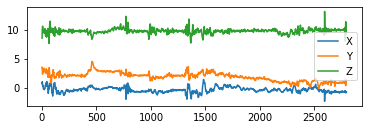

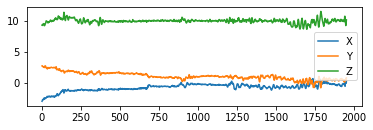

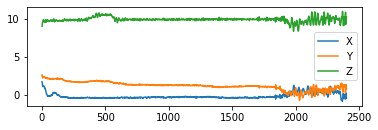

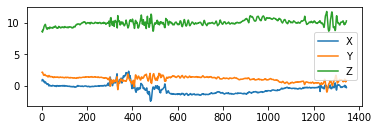

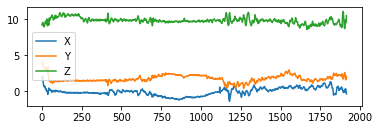

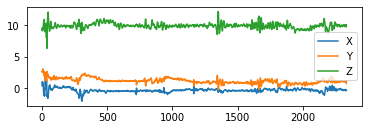

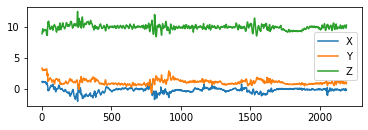

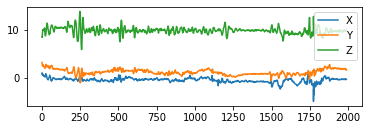

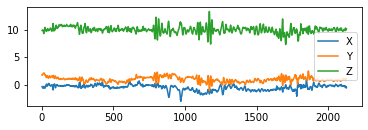

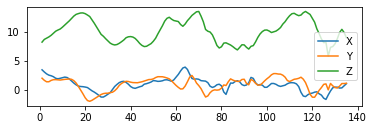

In [348]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in elevatorUp:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()
    


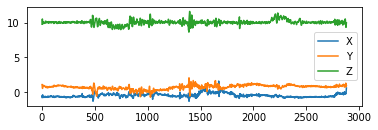

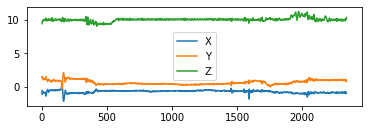

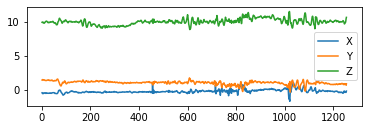

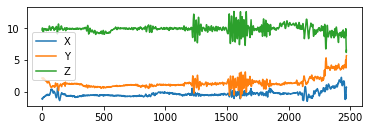

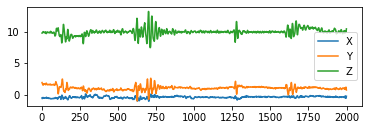

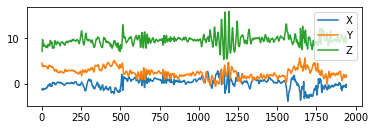

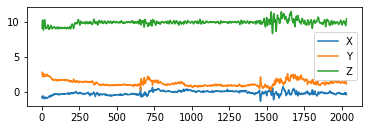

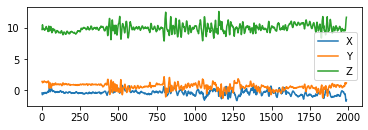

In [350]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in elevatorDown:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

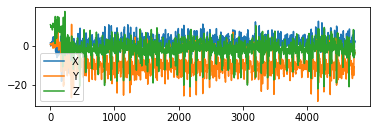

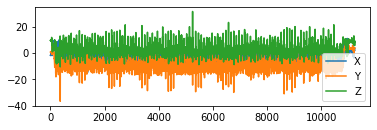

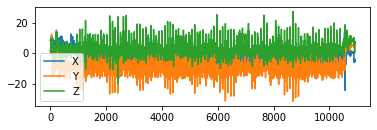

In [351]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Ascending:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

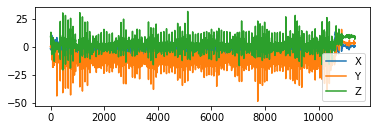

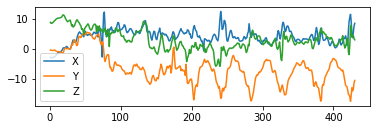

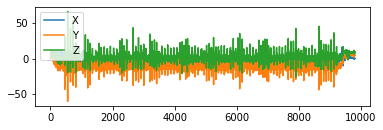

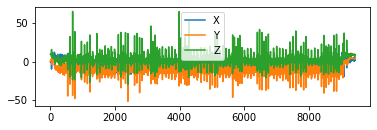

In [352]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Descending:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

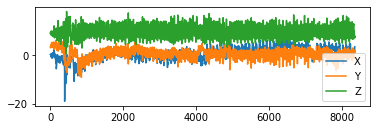

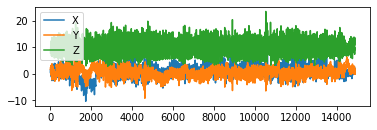

In [353]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Walking:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

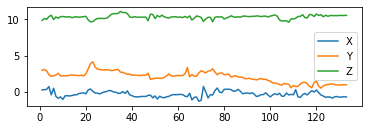

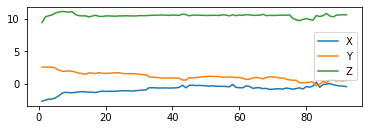

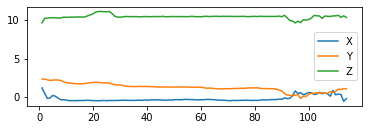

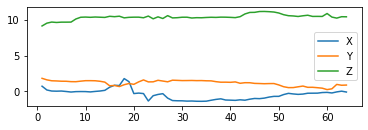

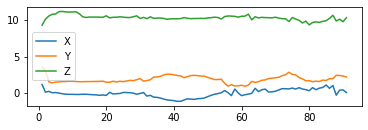

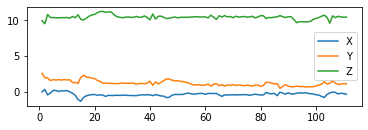

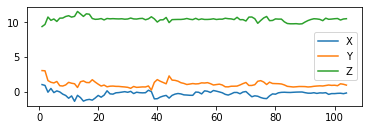

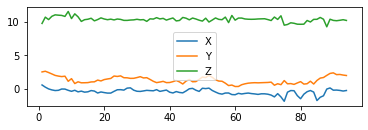

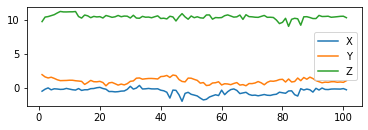

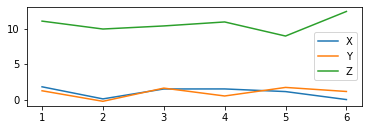

In [51]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in elevatorUp:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei,averageX,label='X')
    plt.plot(averagei,averageY,label='Y')
    plt.plot(averagei,averageZ,label='Z')
    plt.legend()

In [60]:
def peaks(spectra,frequency,number=3,thresh=0.01):
        """ Return the peaks from the Fourier transform
            Variables:
            number:     integer. number of peaks to print.
            thresh:     float. Threshhold intensity for printing.

            Returns: Energy (eV), Intensity (depends on type of spectra)
        """

        from scipy.signal import argrelextrema as pks
        # find all peak indices [idx], and remove those below thresh [jdx]
        idx = pks(np.abs(spectra),np.greater,order=3)
        jdx = np.where((np.abs(spectra[idx]) >= thresh))
        kdx = idx[0][jdx[0]] # indices of peaks matching criteria
        if number > len(kdx):
            number = len(kdx)
        print("First "+str(number)+" peaks (eV) found: ")
        for i in xrange(number):
            print("{0:.4f}".format(frequency[kdx][i]*27.2114),
                  "{0:.4f}".format(spectra[kdx][i])) 

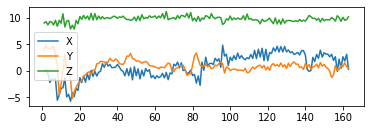

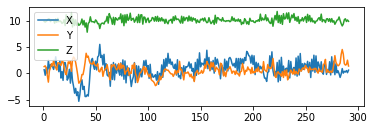

In [90]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Walking:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei,averageX,label='X')
    plt.plot(averagei,averageY,label='Y')
    plt.plot(averagei,averageZ,label='Z')
    plt.legend()

In [69]:
ascendingDB = pd.DataFrame({'AverageX':averageX[:100],
                            'AverageY':averageY[:100],
                            'AverageZ':averageZ[:100]
                           })

In [71]:
ascendingDB.to_csv(r'sample.csv',header=True,index=False)

In [66]:
from scipy.signal import argrelextrema
print(averageX)
resultNP = argrelextrema(np.asarray(averageX[:10]), np.greater)
print(resultNP)

[4.435095840200001, 6.026085204, 4.26276550746, 4.733337427, 6.0726971080000025, 4.804452218, 5.2867032275999986, 5.5496737528, 6.209806836, 4.759325248, 2.1939315780199995, 3.0102657980000003, 2.79342988196, 3.0860708566099992, 3.9477740640000007, 5.1942913599999985, 5.641031794000001, 3.9171948282199995, 0.69674255038, 0.7016708390600003, -2.0350482068000004, -3.0648709106000003, -5.026362292, -5.016313138, -4.787798469600001, -4.836038212, -3.3553128173400006, -4.716636643299999, -4.445816649799999, -5.0418686049999994, -4.735826726, -4.344742721799998, -4.538563821599999, -4.2011264092800005, -4.31918917, -4.605322566000002, -4.901648868200001, -3.8760372896199993, -4.744966432000001, -5.11150024, -4.416242371999998, -5.627536319200002, -4.8298168960000005, -5.376817322000002, -4.741712648, -4.702996527, -5.3567162900000005, -4.469219372200001, -5.0496701139999995, -4.26147397548, -5.021003113999999, -3.4311639392, -4.6085775710000005, -3.3801007255999997, -4.508078637600001, -3.72

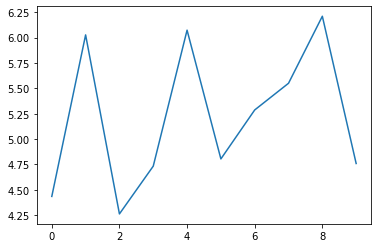

In [67]:
index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(index[:10], averageX[0:10])

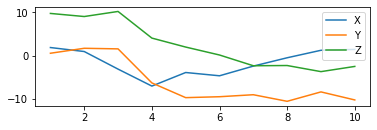

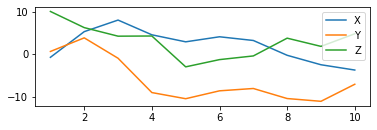

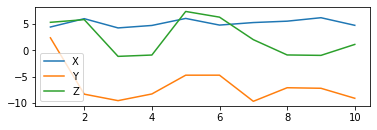

In [59]:
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Ascending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei[0:10],averageX[0:10],label='X')
    plt.plot(averagei[0:10],averageY[0:10],label='Y')
    plt.plot(averagei[0:10],averageZ[0:10],label='Z')
    plt.legend()

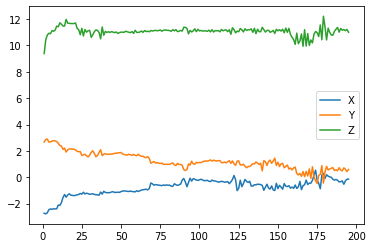

In [210]:
import matplotlib.pyplot as plt
import numpy as np
x, y, z, i = 0,0,0,0
averageX, averageY, averageZ, averagei = [], [],[],[]
counter = 0
counter2 = 0
iteration = 9
for index, value in segment.iterrows():
    if(counter!=iteration):
        counter += 1
        x+=value["AccelerometerX"]
        y+=value["AccelerometerY"]
        z+=value["AccelerometerZ"]
    else:
        counter = 0
        counter2+=1
        averagei.append(counter2)
        averageX.append(x/iteration)
        averageY.append(y/iteration)
        averageZ.append(z/iteration)
        x = 0
        y = 0
        z = 0
        x+=value["AccelerometerX"]
        y+=value["AccelerometerY"]
        z+=value["AccelerometerZ"]
    
plt.plot(averagei,averageX,label='X')
plt.plot(averagei,averageY,label='Y')
plt.plot(averagei,averageZ,label='Z')
plt.legend()

In [174]:
segment.max()

Time                  1574892837867
AccelerometerX              13.7922
AccelerometerY              15.7735
AccelerometerZ              31.8054
GyroscopeX                  5.51779
GyroscopeY                   7.3317
GyroscopeZ                    3.793
GravityX                    7.24011
GravityY                    6.48149
GravityZ                    9.74587
MagneticX                   110.506
MagneticY                   74.7894
MagneticZ                    84.108
Activity          Descending Stairs
dtype: object

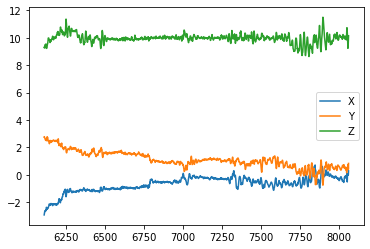

In [200]:
plt.plot(i,x,label='X')
plt.plot(i,y,label='Y')
plt.plot(i,z,label='Z')
plt.legend()

In [186]:
import matplotlib.pyplot as plt
import numpy as np
x, y, z, i = [], [], [], []
for index, value in segment.iterrows():
    i.append(index)
    x.append(value["GravityX"])
    y.append(value["GravityY"])
    z.append(value["GravityZ"])
    
plt.plot(i,x,label='X')
plt.plot(i,y,label='Y')
plt.plot(i,z,label='Z')
plt.legend()

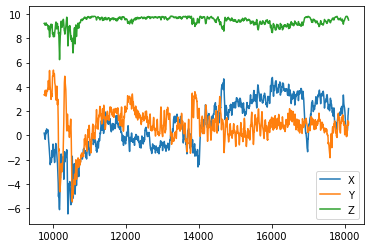

In [59]:
db.head()

,Time,AccelerometerX,AccelerometerY,AccelerometerZ,GyroscopeX,GyroscopeY,GyroscopeZ,GravityX,GravityY,GravityZ,MagneticX,MagneticY,MagneticZ,Activity
177,1574891334876,0.928421,3.531799,8.602203,-0.054565,0.048904,0.515686,0.165276,3.268024,9.244626,27.859497,13.642883,35.116577,Elevator Up
178,1574891334886,0.698700,3.591629,9.477966,-0.388092,0.092270,0.378235,0.175984,3.245221,9.252458,27.859497,13.642883,35.116577,Elevator Up
179,1574891334896,1.069595,3.139389,10.064209,-0.567703,0.138092,0.228577,0.176331,3.199256,9.268445,28.161621,13.500977,34.222412,Elevator Up
180,1574891334908,0.969086,2.663208,10.315460,-0.543869,0.051346,0.008652,0.174714,3.145300,9.286923,28.161621,13.500977,34.222412,Elevator Up
181,1574891334918,0.763306,2.457428,10.432709,-0.410095,0.011642,-0.071350,0.175338,3.096808,9.303194,27.880860,14.234924,34.373474,Elevator Up


In [174]:
features = []

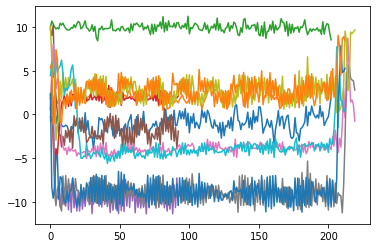

In [175]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons
import matplotlib.pyplot as plt
import numpy as np

for sample in Ascending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

In [176]:
features[0]

[-1.0068593083100787,
 2.1916245624048454,
 9.931664938958624,
 0.9573600359695728,
 0.756745631630736,
 0.4823137431201764,
 -0.0120908619730198,
 -0.013255293430693062,
 0.007048867096039615,
 -3.1984838707149277,
 -10.9385242472687,
 -7.740040376553783,
 0.08436137351875678,
 0.115969247262211,
 -0.4256052979943219,
 68,
 55,
 74,
 69,
 56,
 73,
 11.59053151414634,
 120.68824704172721,
 61.01870047474266,
 -2.838235294117647,
 -3.5272727272727273,
 -2.675675675675676,
 1.3217174270645051,
 1.7375857934429482,
 1.091429276002306,
 -0.36415526012144117,
 2.637662469872,
 10.308253212486486,
 0.7736363414951414,
 0.6846788970749295,
 0.35062328757601086,
 -1.6305090376475946,
 1.736213385687393,
 9.579510578547945,
 0.7648744481480697,
 0.649417870400215,
 0.3424784571873493,
 0,
 0,
 0,
 'Climbing Stairs']

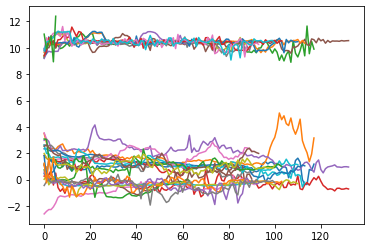

In [177]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons

import matplotlib.pyplot as plt
import numpy as np

for sample in elevatorUp:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

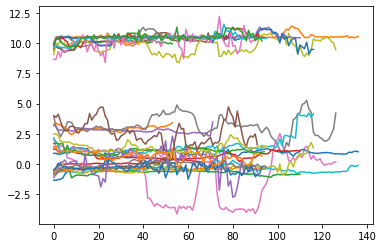

In [178]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons

import matplotlib.pyplot as plt
import numpy as np

for sample in elevatorDown:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

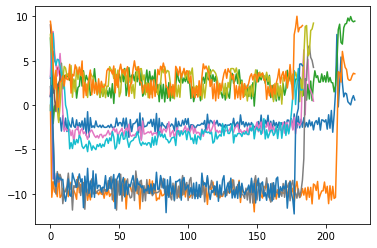

In [179]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons

import matplotlib.pyplot as plt
import numpy as np

for sample in Descending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

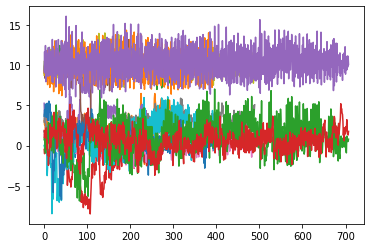

In [180]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons

import matplotlib.pyplot as plt
import numpy as np

for sample in Walking:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

In [181]:
#now create a dataframe
header = []
for i in range(1,25):
    header.append(f'f{i}')
for i in range(31,52):
    header.append(f'f{i}')
header.append('label')


In [182]:
df = pd.DataFrame(features,columns=header)

In [183]:
df.to_csv(r'sampleFeatures.csv',header=True,index=False)

In [108]:
#the following section is feature extraction
#path = os.getcwd()+'/sample.csv'
def featureExtraction(data):
#data = pd.read_csv(path)
    # print(data.head(5))
    features = []
    X = data.loc[:, 'AverageX']
    Y = data.loc[:, 'AverageY']
    Z = data.loc[:, 'AverageZ']

    plt.plot(range(X.size),X)
    plt.plot(range(X.size),Y)
    plt.plot(range(X.size),Z)

    Xnp = X.to_numpy()
    Ynp = Y.to_numpy()
    Znp = Z.to_numpy()
    # print(X)
    #average (X, Y, Z)
    f1 = X.mean() #Xmean
    f2 = Y.mean() #Ymean
    f3 = Z.mean() #Zmean
    # print(f1,f2,f3)


    #standard deviation (X, Y, Z)
    f4 = X.std() #X_std
    f5 = Y.std() #Y_std
    f6 = Z.std() #Z_std
    # print(f4,f5,f6)


    #average jerk (X, Y, Z)
    dx,dy,dz = [],[],[]
    for i in range(X.size-1):
        dx.append(X[i]-X[i+1])
        dy.append(Y[i]-Y[i+1])
        dz.append(Z[i]-Z[i+1])

    f7 = np.array(dx).mean()
    f8 = np.array(dy).mean()
    f9 = np.array(dz).mean()
    # print(f7,f8,f9)


    #average distance between axes (XY, XZ, YZ) ??
    f10 = (X-Y).mean()
    f11 = (X-Z).mean()
    f12 = (Y-Z).mean()

    # correlation (XY, XZ, YZ), 
    f13 = X.corr(Y)
    f14 = X.corr(Z)
    f15 = Y.corr(Z)

    # number of peaks (X, Y, Z)

    Xpeak = argrelextrema(Xnp, np.greater)[0]
    Ypeak = argrelextrema(Ynp, np.greater)[0]
    Zpeak = argrelextrema(Znp, np.greater)[0]
    f16 = len(Xpeak)
    f17 = len(Ypeak)
    f18 = len(Zpeak)

    # print(f16,f17,f18)


    # number of valleys (X, Y, Z), 
    Xvalley = argrelextrema(Xnp, np.less)[0]
    Yvalley = argrelextrema(Ynp, np.less)[0]
    Zvalley = argrelextrema(Znp, np.less)[0]
    f19 = len(Xvalley)
    f20 = len(Yvalley)
    f21 = len(Zvalley)
    # print(f19,f20,f21)

    # print(Xpeak,Xvalley)

    # # root mean square (RMS) (X, Y, Z)
    f22 = ((X-Y)**2).mean()
    f23 = ((X-Z)**2).mean()
    f24 = ((Y-Z)**2).mean()

    # # energy (X, Y, Z)
    # f25 = X.min()
    # f26 = Y.min()
    # f27 = Z.min()

    # entropy (X, Y, Z)
    # f28 = X.min()
    # f29 = Y.min()
    # f30 = Z.min()

    # average side height (X, Y, Z)
    Xcnt,Ycnt,Zcnt = 0,0,0
    Xsh,Ysh,Zsh = [],[],[]
    for i in range(len(Xpeak)-1):
        Xsh.append(Xpeak[i]-Xpeak[i+1])
        Xcnt += Xpeak[i]-Xpeak[i+1]
    for i in range(len(Ypeak)-1):
        Ysh.append(Ypeak[i]-Ypeak[i+1])
        Ycnt += Ypeak[i]-Ypeak[i+1]
    for i in range(len(Zpeak)-1):
        Zsh.append(Zpeak[i]-Zpeak[i+1])
        Zcnt += Zpeak[i]-Zpeak[i+1]

    f31 = Xcnt/len(Xpeak)
    f32 = Ycnt/len(Ypeak)
    f33 = Zcnt/len(Zpeak)

    # print(f31,f32,f33)

    # standard deviation side height (X, Y, Z)
    f34 = np.array(Xsh).std()
    f35 = np.array(Ysh).std()
    f36 = np.array(Zsh).std()
    # print(f34)

    Xpv = [X[i] for i in Xpeak]
    Ypv = [Y[i] for i in Ypeak]
    Zpv = [Z[i] for i in Zpeak]
    # average peak value (X, Y, Z)
    f37 = np.array(Xpv).mean()
    f38 = np.array(Ypv).mean()
    f39 = np.array(Zpv).mean()
    # print(f37,f38,f39)

    # standard deviation peak value(X, Y, Z)

    f40 = np.array(Xpv).std()
    f41 = np.array(Ypv).std()
    f42 = np.array(Zpv).std()
    # print(f40,f41)

    # average valley value (X, Y, Z)
    Xpv1 = [X[i] for i in Xvalley]
    Ypv1 = [Y[i] for i in Yvalley]
    Zpv1 = [Z[i] for i in Zvalley]
    f43 = np.array(Xpv1).mean()
    f44 = np.array(Ypv1).mean()
    f45 = np.array(Zpv1).mean()

    # standard deviation valley value(X, Y, Z)
    f46 = np.array(Xpv1).std()
    f47 = np.array(Ypv1).std()
    f48 = np.array(Zpv1).std()

    # axis crossing (XY, XZ, YZ)
    #XY
    XYcc,YZcc,XZcc = 0,0,0
    for i in range(X.size-1):
        if (X[i]-Y[i])*(X[i+1]-Y[i+1])<0:
            XYcc += 1
        if (Z[i]-Y[i])*(Z[i+1]-Y[i+1])<0:
            YZcc += 1
        if (Z[i]-X[i])*(Z[i+1]-X[i+1])<0:
            XZcc += 1
    # print(XYcc,YZcc,XZcc)
    # # print(f4)

    f49 = XYcc
    f50 = YZcc
    f51 = XZcc
    # print(f49,f50,f51)
    features.append(f1)
    features.append(f2)
    features.append(f3)
    features.append(f4)
    features.append(f5)
    features.append(f6)
    features.append(f7)
    features.append(f8)
    features.append(f9)
    features.append(f10)
    features.append(f11)
    features.append(f12)
    features.append(f13)
    features.append(f14)
    features.append(f15)
    features.append(f16)
    features.append(f17)
    features.append(f18)
    features.append(f19)
    features.append(f20)
    features.append(f21)
    features.append(f22)
    features.append(f23)
    features.append(f24)
   
    features.append(f31)
    features.append(f32)
    features.append(f33)
    features.append(f34)
    features.append(f35)
    features.append(f36)
    features.append(f37)
    features.append(f38)
    features.append(f39)
    features.append(f40)
    features.append(f41)
    features.append(f42)
    features.append(f43)
    features.append(f44)
    features.append(f45)
    features.append(f46)
    features.append(f47)
    features.append(f48)
    features.append(f49)
    features.append(f50)
    features.append(f51)
    return features
    
    